In [1]:
import pickle, numpy as np, tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [3]:
with open("data_batch_1", "rb") as f:
    b = pickle.load(f, encoding='bytes')

In [5]:
X = b[b'data'].reshape(-1,3,32,32).transpose(0,2,3,1)/255.0
y = np.array(b[b'labels'])
y_cat = tf.keras.utils.to_categorical(y, 10)

In [8]:
X_train, X_test = X[:2000], X[2000:2500]
y_train, y_test = y_cat[:2000], y_cat[2000:2500]

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32,3)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

C:\Users\vaishnavi\anaconda3\envs\tensorflow_env\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.1525 - loss: 2.2921 - val_accuracy: 0.2240 - val_loss: 2.1599
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.2270 - loss: 2.1209 - val_accuracy: 0.2040 - val_loss: 2.0799
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2565 - loss: 2.0008 - val_accuracy: 0.2780 - val_loss: 2.0000
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.2860 - loss: 1.9092 - val_accuracy: 0.2680 - val_loss: 1.9983
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3130 - loss: 1.8852 - val_accuracy: 0.3060 - val_loss: 1.9608


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         196,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 597,248 (2.28 MB)

 Trainable params: 199,082 (777.66 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 398,166 (1.52 MB)

In [18]:
y_pred = model.predict(X_test).argmax(1)
y_true = y_test.argmax(1)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


<Axes: >

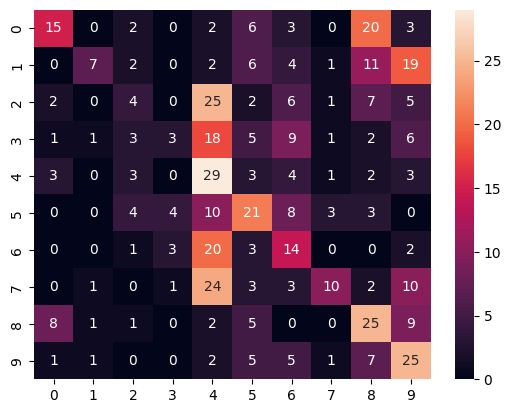

In [20]:
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt="d")

In [22]:

print(classification_report(y_true, y_pred))


              precision    recall  f1-score   support

           0       0.50      0.29      0.37        51
           1       0.64      0.13      0.22        52
           2       0.20      0.08      0.11        52
           3       0.27      0.06      0.10        49
           4       0.22      0.60      0.32        48
           5       0.36      0.40      0.38        53
           6       0.25      0.33      0.28        43
           7       0.56      0.19      0.28        54
           8       0.32      0.49      0.38        51
           9       0.30      0.53      0.39        47

    accuracy                           0.31       500
   macro avg       0.36      0.31      0.28       500
weighted avg       0.37      0.31      0.28       500

